In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("co_GTR_G4_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n73          1.6602 ( 1.3522,  2.2304) ( 1.3099,  2.1141)  0.8043 (Jnode 142)\n',
 't_n74          1.5055 ( 1.3027,  1.7730) ( 1.2808,  1.7395)  0.4587 (Jnode 141)\n',
 't_n75          0.9392 ( 0.8607,  1.0224) ( 0.8585,  1.0196)  0.1611 (Jnode 140)\n',
 't_n76          0.8767 ( 0.8071,  0.9500) ( 0.8059,  0.9487)  0.1428 (Jnode 139)\n',
 't_n77          0.8116 ( 0.7489,  0.8774) ( 0.7482,  0.8765)  0.1283 (Jnode 138)\n',
 't_n78          0.8014 ( 0.7397,  0.8662) ( 0.7400,  0.8663)  0.1263 (Jnode 137)\n',
 't_n79          0.7688 ( 0.7097,  0.8306) ( 0.7108,  0.8315)  0.1207 (Jnode 136)\n',
 't_n80          0.7076 ( 0.6525,  0.7650) ( 0.6517,  0.7639)  0.1122 (Jnode 135)\n',
 't_n81          0.6906 ( 0.6365,  0.7469) ( 0.6340,  0.7443)  0.1103 (Jnode 134)\n',
 't_n82          0.6397 ( 0.5875,  0.6940) ( 0.5857,  0.6918)  0.1061 (Jnode 133)\n',
 't_n83          0.5406 ( 0.4879,  0.5948) ( 0.4865,  0.5932)  0.1066 (Jnode 132)\n',
 't_n84          0.4400 ( 0.3864,  0.4954) ( 0.3875,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    lower_ci_iqtree.append(float(line[3][:-1]))
    upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
    
for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
    
for line in var_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_iqtree.append(float(line[1]))
    lower_ci_var_iqtree.append(float(line[3][:-1]))
    upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143']

In [6]:
posterior_mean_iqtree

[1.6602,
 1.5055,
 0.9392,
 0.8767,
 0.8116,
 0.8014,
 0.7688,
 0.7076,
 0.6906,
 0.6397,
 0.5406,
 0.44,
 0.2491,
 0.1354,
 0.0672,
 0.0348,
 0.0164,
 0.1984,
 0.1864,
 0.1302,
 0.4782,
 0.4126,
 0.3686,
 0.1031,
 0.3694,
 0.5125,
 0.7561,
 0.7188,
 0.4896,
 0.375,
 0.2259,
 0.1633,
 0.0501,
 0.1695,
 0.1293,
 0.1099,
 0.0922,
 0.0712,
 0.0524,
 0.2866,
 0.2566,
 0.1501,
 0.1234,
 0.0509,
 0.2314,
 0.2037,
 0.2223,
 0.6191,
 0.4113,
 0.8046,
 0.781,
 0.7713,
 0.5788,
 0.1694,
 0.0859,
 0.4928,
 0.4153,
 0.7545,
 0.6214,
 0.5859,
 0.5165,
 0.1824,
 0.0791,
 0.645,
 0.6493,
 0.9227,
 0.7711,
 0.6649,
 0.7842,
 0.5079,
 0.412]

In [7]:
lower_ci_iqtree

[1.3522,
 1.3027,
 0.8607,
 0.8071,
 0.7489,
 0.7397,
 0.7097,
 0.6525,
 0.6365,
 0.5875,
 0.4879,
 0.3864,
 0.2017,
 0.1054,
 0.051,
 0.0261,
 0.0122,
 0.1586,
 0.1486,
 0.1019,
 0.427,
 0.3642,
 0.3222,
 0.0816,
 0.3193,
 0.4723,
 0.6972,
 0.6618,
 0.4321,
 0.3235,
 0.1885,
 0.134,
 0.0385,
 0.1395,
 0.1054,
 0.0892,
 0.0745,
 0.057,
 0.0415,
 0.2414,
 0.2144,
 0.1202,
 0.0979,
 0.0389,
 0.1811,
 0.158,
 0.1735,
 0.5573,
 0.3368,
 0.7443,
 0.7235,
 0.7149,
 0.5227,
 0.1309,
 0.0637,
 0.4361,
 0.3587,
 0.6999,
 0.5687,
 0.5329,
 0.4626,
 0.1403,
 0.0583,
 0.5992,
 0.5977,
 0.846,
 0.6936,
 0.5791,
 0.6994,
 0.297,
 0.2381]

In [8]:
upper_ci_iqtree

[2.2304,
 1.773,
 1.0224,
 0.95,
 0.8774,
 0.8662,
 0.8306,
 0.765,
 0.7469,
 0.694,
 0.5948,
 0.4954,
 0.3017,
 0.1705,
 0.0873,
 0.0461,
 0.0218,
 0.2434,
 0.2293,
 0.1634,
 0.5305,
 0.4628,
 0.4176,
 0.1282,
 0.422,
 0.5745,
 0.8172,
 0.7772,
 0.5473,
 0.4272,
 0.2662,
 0.1957,
 0.0641,
 0.2026,
 0.1563,
 0.1337,
 0.1128,
 0.088,
 0.0653,
 0.3333,
 0.3007,
 0.1829,
 0.152,
 0.0655,
 0.287,
 0.2546,
 0.2767,
 0.6763,
 0.4837,
 0.8665,
 0.8395,
 0.8284,
 0.6347,
 0.2134,
 0.1131,
 0.5506,
 0.4744,
 0.8095,
 0.6713,
 0.6358,
 0.5681,
 0.2295,
 0.1052,
 0.6721,
 0.7066,
 1.0039,
 0.8473,
 0.7451,
 0.8604,
 0.6926,
 0.563]

In [9]:
file_LG = open("co_GTR_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    lower_ci_baseml.append(float(line[3][:-1]))
    upper_ci_baseml.append(float(line[4][:-1]))
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
for line in var_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_baseml.append(float(line[1]))
    lower_ci_var_baseml.append(float(line[3][:-1]))
    upper_ci_var_baseml.append(float(line[4][:-1]))

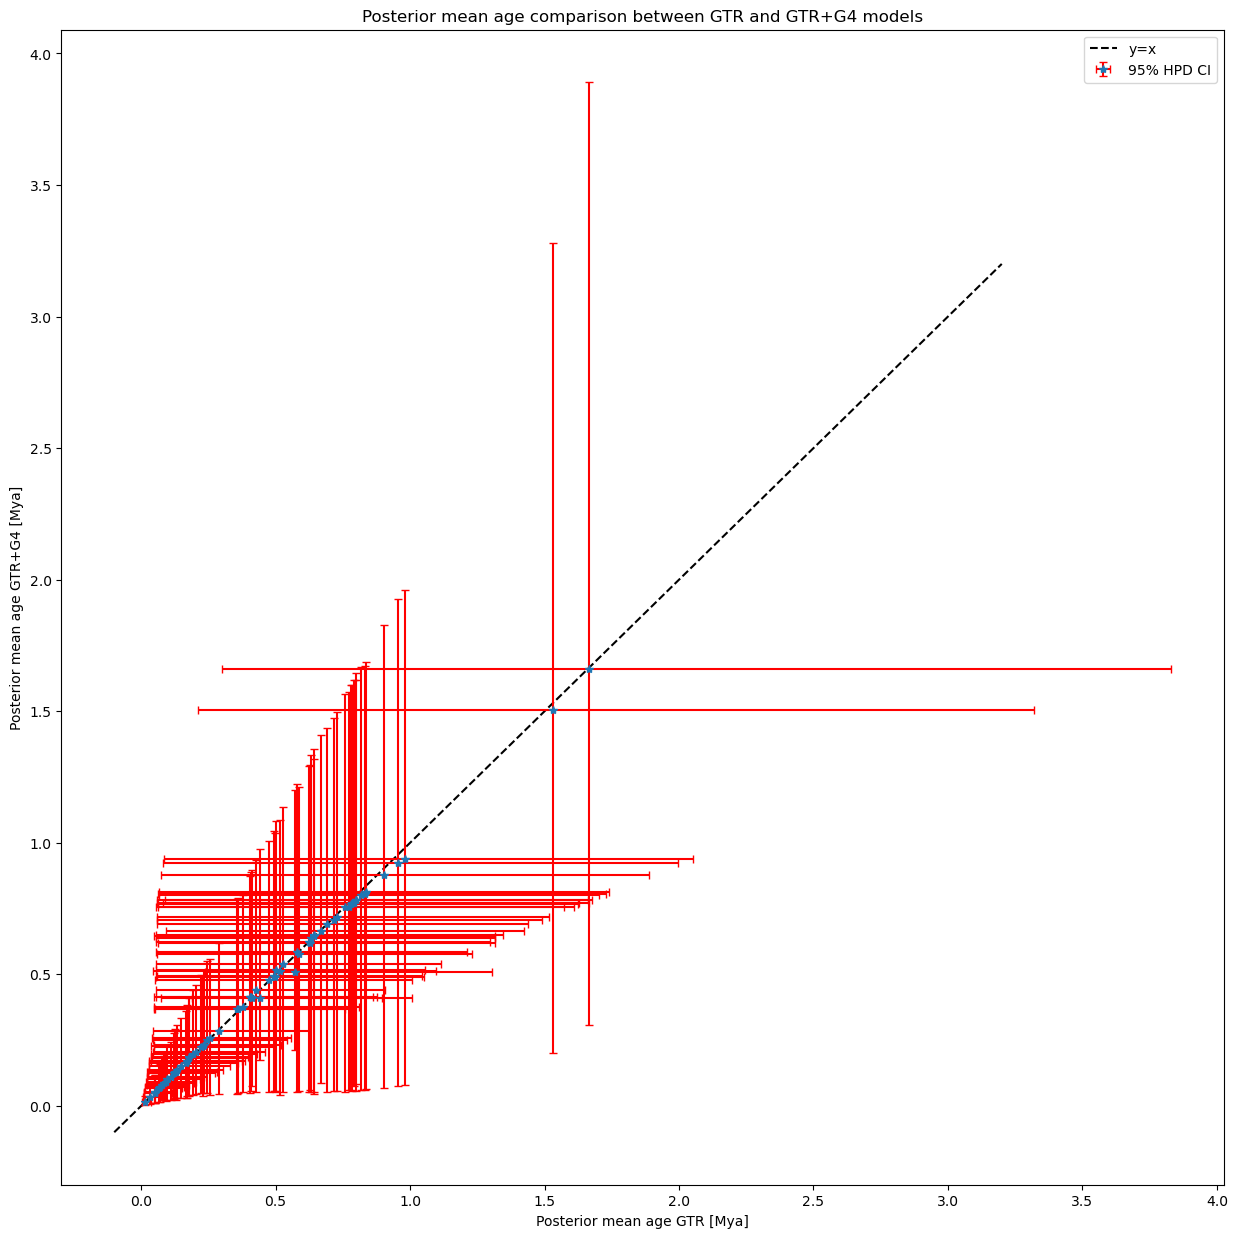

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,3.2],
        [-0.1, 3.2],
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age GTR [Mya]')
ax.set_ylabel('Posterior mean age GTR+G4 [Mya]')
ax.set_title('Posterior mean age comparison between GTR and GTR+G4 models')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./co_mammals_posterior_mean_age_comparison_GTR_G4.png')

In [11]:
posterior_mean_baseml

[1.6643,
 1.5303,
 0.9805,
 0.9048,
 0.8344,
 0.8173,
 0.7803,
 0.7153,
 0.6901,
 0.6304,
 0.5291,
 0.4254,
 0.2442,
 0.1343,
 0.0666,
 0.0343,
 0.0161,
 0.1924,
 0.1774,
 0.1257,
 0.4754,
 0.4059,
 0.3552,
 0.0971,
 0.3617,
 0.5154,
 0.7734,
 0.7271,
 0.4983,
 0.3801,
 0.2291,
 0.1653,
 0.0505,
 0.1713,
 0.13,
 0.1102,
 0.0922,
 0.0713,
 0.0523,
 0.2896,
 0.2577,
 0.1499,
 0.1227,
 0.0502,
 0.2349,
 0.2054,
 0.2238,
 0.6275,
 0.4125,
 0.8307,
 0.7995,
 0.7833,
 0.5862,
 0.1703,
 0.0851,
 0.4936,
 0.4088,
 0.7576,
 0.6224,
 0.5799,
 0.5016,
 0.1779,
 0.0759,
 0.644,
 0.6415,
 0.9534,
 0.7922,
 0.6699,
 0.7977,
 0.5721,
 0.4437]

In [12]:
posterior_mean_iqtree

[1.6602,
 1.5055,
 0.9392,
 0.8767,
 0.8116,
 0.8014,
 0.7688,
 0.7076,
 0.6906,
 0.6397,
 0.5406,
 0.44,
 0.2491,
 0.1354,
 0.0672,
 0.0348,
 0.0164,
 0.1984,
 0.1864,
 0.1302,
 0.4782,
 0.4126,
 0.3686,
 0.1031,
 0.3694,
 0.5125,
 0.7561,
 0.7188,
 0.4896,
 0.375,
 0.2259,
 0.1633,
 0.0501,
 0.1695,
 0.1293,
 0.1099,
 0.0922,
 0.0712,
 0.0524,
 0.2866,
 0.2566,
 0.1501,
 0.1234,
 0.0509,
 0.2314,
 0.2037,
 0.2223,
 0.6191,
 0.4113,
 0.8046,
 0.781,
 0.7713,
 0.5788,
 0.1694,
 0.0859,
 0.4928,
 0.4153,
 0.7545,
 0.6214,
 0.5859,
 0.5165,
 0.1824,
 0.0791,
 0.645,
 0.6493,
 0.9227,
 0.7711,
 0.6649,
 0.7842,
 0.5079,
 0.412]

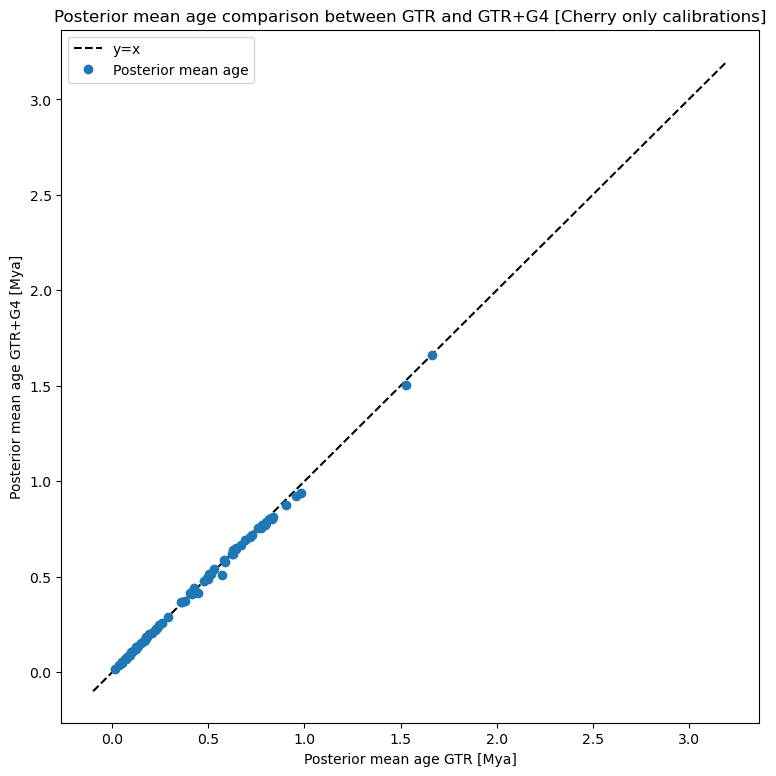

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9, 9))
ax.plot([-0.1,3.2],
        [-0.1, 3.2],
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age GTR [Mya]')
ax.set_ylabel('Posterior mean age GTR+G4 [Mya]')
ax.set_title('Posterior mean age comparison between GTR and GTR+G4 [Cherry only calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./co_mammals_posterior_mean_age_comparison_GTR_G4_scatter.png')

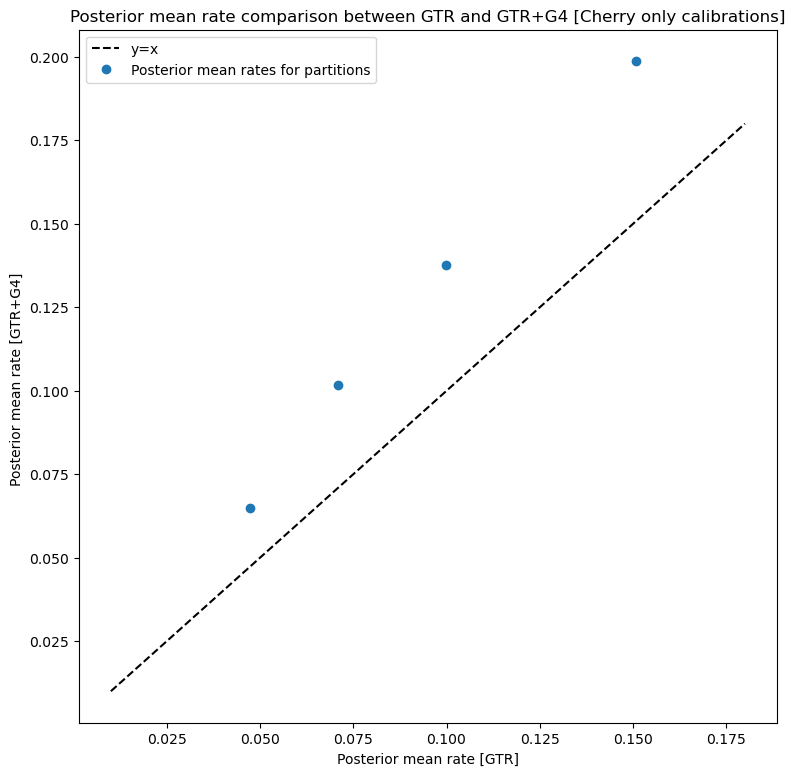

In [14]:
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([0.01,0.18], 
        [0.01, 0.18], 
        'k--', label='y=x')
ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
 
# Labels and title
ax.set_xlabel('Posterior mean rate [GTR]')
ax.set_ylabel('Posterior mean rate [GTR+G4] ')
ax.set_title('Posterior mean rate comparison between GTR and GTR+G4 [Cherry only calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./co_mammals_posterior_mean_rate_comparison_GTR_G4_all_scatter.png')